In [ ]:
# default_exp hw1

# Import

In [ ]:
# export
import numpy as np
from PIL import Image
import matplotlib.pyplot as plt

from scipy import ndimage
import PIL
from skimage.transform import resize
import time

from cs371.utils import *

# cells

In [ ]:
def load_cells_grayscale(filename, n_pixels = 0):
    """
    Load in a grayscale image of the cells, where 1 is maximum brightness
    and 0 is minimum brightness

    Parameters
    ----------
    filename: string
        Path to image holding the cells
    n_pixels: int
        Number of pixels in the image
    """
    cells_original = plt.imread(filename)
    cells_grey = np.asarray(PIL.Image.fromarray(cells_original).convert('L'))
    cells_grey = ndimage.uniform_filter(cells_grey, size=10)
    cells_grey = cells_grey - np.min(cells_grey)
    cells_grey = cells_grey/np.max(cells_grey)
    N = int(np.sqrt(n_pixels))
    if n_pixels > 0:
        cells_grey = resize(cells_grey, (N, N), anti_aliasing=True)
    return cells_grey

In [ ]:
def get_cell_labels(I, thresh, uf_class):
    """
    Parameters
    ----------
    I: ndarray(M, N)
        A grayscale image of cells
    thresh: float
        Threshold above which to consider something inside a cell
    uf_class: class
        A data structure that implements the union find ADT.
        Must contain the methods union(i, j), find(i, j), and
        get_set_label(i)
    
    Returns
    -------
    labels: ndarray(M, N)
        An array of labels for the pixels in the image
    """
    M = I.shape[0]
    N = I.shape[1]
    # This is the disjoint set object on which you will 
    # call union, find, and get_set_label
    djset = uf_class(np.arange(M*N)) 
    # This is the 2D array of labels that you will fill
    # in and return
    labels = np.ones((M, N), dtype=int)
    # Get union
    for y in range(M):
        for x in range(N):
            if x > 0:   # Check left
                if I[y, x] > thresh and I[y, x-1] > thresh:
                    djset.union(y*N + x, y*N + (x-1))            
            if x < N-1: # Check right
                if I[y, x] > thresh and I[y, x+1] > thresh:
                    djset.union(y*N + x, y*N + (x+1))      
            if y > 0:   # Check up
                if I[y, x] > thresh and I[y-1, x] > thresh:
                    djset.union(y*N + x, (y-1)*N + (x))      
            if y < M-1: # Check down
                if I[y, x] > thresh and I[y+1, x] > thresh:
                    djset.union(y*N + x, (y+1)*N + (x))    

    # Fill labels
    for i in range(M*N):
        x = i % N
        y = i // N
        labels[y, x] = djset.get_set_label(i)

    return labels

In [ ]:
def permute_labels(labels):
    """
    Shuffle around labels by raising them to a prime and
    modding by a large-ish prime, so that cells are easier
    to see against their backround
    Parameters
    ----------
    labels: ndarray(M, N)
        An array of labels for the pixels in the image

    Returns
    -------
    labels_shuffled: ndarray(M, N)
        A new image where the labels are different but still
        the same within connected components
    """
    return (labels**31) % 833

In [ ]:
def get_cluster_centers(labels):
    """
    Compute an array that holds the row and column of the
    mean of each label location that has more than 1 pixel
    assigned to it

    Parameters
    ----------
    labels: ndarray(M, N)
        An array of labels for the pixels in the image
    
    Returns
    -------
    X: ndarray(K, 2)
        An array of average row/column indices of each of the
        K labels that had at least 2 pixels assigned to them
    """

    coords = {}
    M = labels.shape[0]
    N = labels.shape[1]
    for y in range(M):
        for x in range(N):
            l = labels[y, x]
            if l in coords: coords[l].append([x, y])
            else:           coords[l] = [[x, y]]

    centroids = {}
    for label, ps in coords.items():
        if len(ps) > 1:
            ps = np.array(ps)
            centroids[label] = ps[:,0].mean(), ps[:,1].mean()

    return np.array(list(centroids.values()))

In [ ]:
def time_test():
    thresh = 0.7
    n_pixels = []
    times_idsset = []
    times_uffast = []
    for n in range(100, 100*100, 500):
        n_pixels.append(n)
        I = load_cells_grayscale("Cells.jpg", n)
        ## TODO: Fill this in.  Take an average of the average
        ## time that it takes per operation to run get_cell_labels
        ## for both the IDsSet and the UFFast implementation of
        ## union find, and store these times in times_idsset
        ## and times_uffast, respectively
    plt.plot(n_pixels, times_idsset)
    plt.plot(n_pixels, times_uffast)
    plt.legend(["IDsSet", "UFFast"])
    plt.xlabel("Number of pixels")
    plt.ylabel("Average Elapsed Time Per Operation")
    plt.savefig("Timings.png", bbox_inches='tight')

# DisjointSet

In [ ]:
from cs371.module3 import DisjointSetsMergeByHeightAndPathCompression2

Monkey patch `get_set_label`

In [ ]:
def get_set_label(self, i): return int(self._root(i))

In [ ]:
DisjointSetsMergeByHeightAndPathCompression2.get_set_label = get_set_label

# HW1

In [ ]:
# Put stuff here that will run when you hit the play button
thresh = 0.7
I = load_cells_grayscale("data/Cells.jpg")

In [ ]:
labels = get_cell_labels(I, thresh, DisjointSetsMergeByHeightAndPathCompression2)

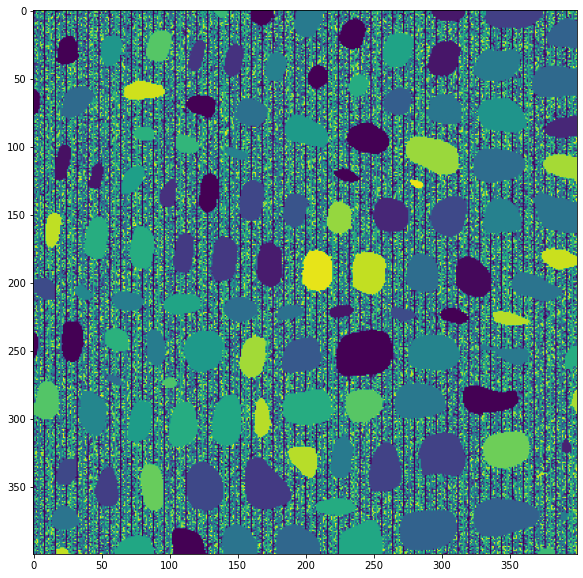

In [ ]:
plt.figure(figsize=(10, 10))
plt.imshow(permute_labels(labels))

In [ ]:
cells_original = plt.imread("data/Cells.jpg")
X = get_cluster_centers(labels)
X = np.array(X)

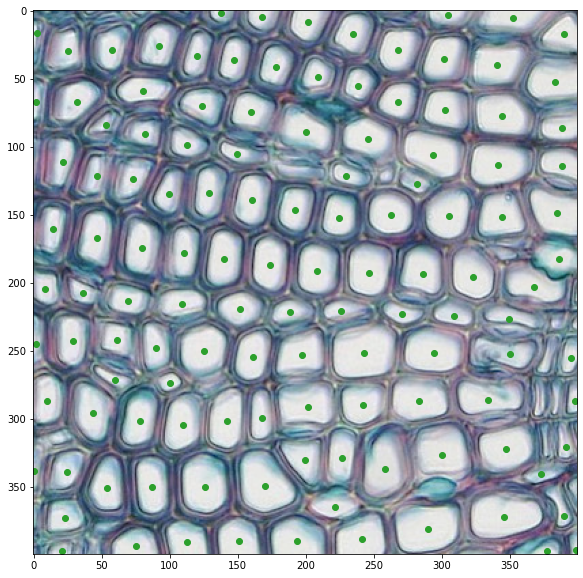

In [ ]:
plt.figure(figsize=(10,10))
plt.imshow(cells_original)
plt.scatter(X[:, 0], X[:, 1], c='C2')

# Build

In [ ]:
build_notebook()

<IPython.core.display.Javascript object>

Converted hw1.ipynb.
